In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
import numpy as np


#1) CARGA LOS DATOS Y EXPLÓRALOS. ELIMINA LOS DATOS NULOS O INCORRECTOS

In [ ]:
cardio = pd.read_csv('cardio.csv')
cardio

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,M,39,4.0,No,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,F,46,2.0,No,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,M,48,1.0,Yes,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,F,61,3.0,Yes,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,F,46,3.0,Yes,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,M,50,1.0,Yes,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,M,51,3.0,Yes,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,F,48,2.0,Yes,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,F,44,1.0,Yes,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [ ]:
cardio.dropna()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,M,39,4.0,No,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,F,46,2.0,No,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,M,48,1.0,Yes,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,F,61,3.0,Yes,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,F,46,3.0,Yes,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,M,58,3.0,No,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,M,68,1.0,No,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,M,50,1.0,Yes,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,M,51,3.0,Yes,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [ ]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 529.9+ KB


In [ ]:
cardio.isnull().sum()

sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
cardio.fillna(0,inplace=True)

In [ ]:
cardio.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,49.584946,1.929920,8.941482,0.029259,0.005899,0.310524,0.025720,233.928740,132.352407,82.893464,25.686331,75.861019,74.462482,0.151958
std,8.572160,1.053018,11.902399,0.168552,0.076587,0.462763,0.158316,51.169478,22.038097,11.910850,4.420935,12.081533,32.869879,0.359023
min,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83.500000,48.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,117.000000,75.000000,23.050000,68.000000,68.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.000000,128.000000,82.000000,25.380000,75.000000,77.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


#2) ESCOGE TRES VARIABLES CUANTITATIVAS Y REALIZA UN ANÁLISIS DESCRIPTIVO DE ELLAS UTILIZANDO INDICADORES Y GRÁFICOS ¿CUAL PRESENTA MAYOR DISPERSIÓN?

In [ ]:
cardio1= cardio[['age', 'BMI', 'glucose']]
cardio1

,age,BMI,glucose
0,39,26.97,77.0
1,46,28.73,76.0
2,48,25.34,70.0
3,61,28.58,103.0
4,46,23.10,85.0
...,...,...,...
4233,50,25.97,86.0
4234,51,19.71,68.0
4235,48,22.00,86.0
4236,44,19.16,0.0


In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stat
import seaborn as sns

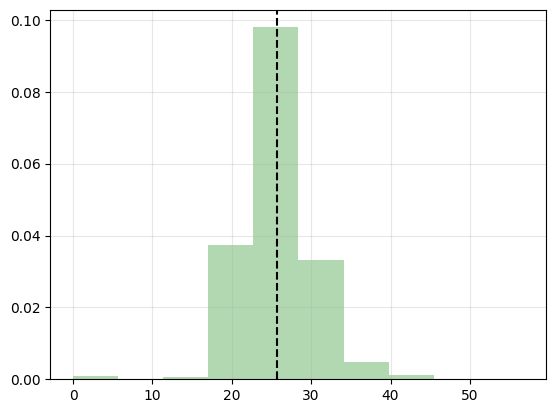

In [ ]:
indice_masa_corporal = plt.hist(cardio['BMI'], density=True, bins=10, color='green', alpha=0.3)
plt.grid(alpha=0.3)
plt.axvline(cardio['BMI'].mean(), color='black', linestyle='--')

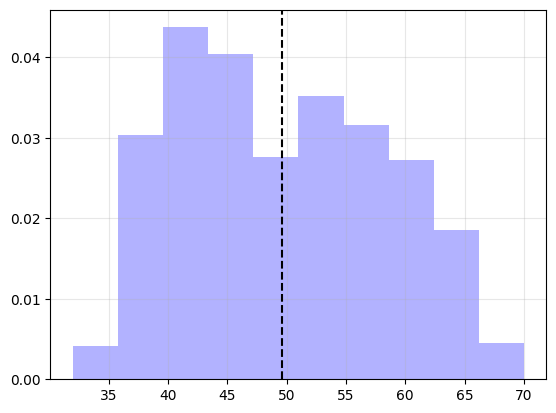

In [ ]:
edad = plt.hist(cardio['age'], density=True, bins=10, color='blue', alpha=0.3)
plt.grid(alpha=0.3)
plt.axvline(cardio['age'].mean(), color='black', linestyle='--')

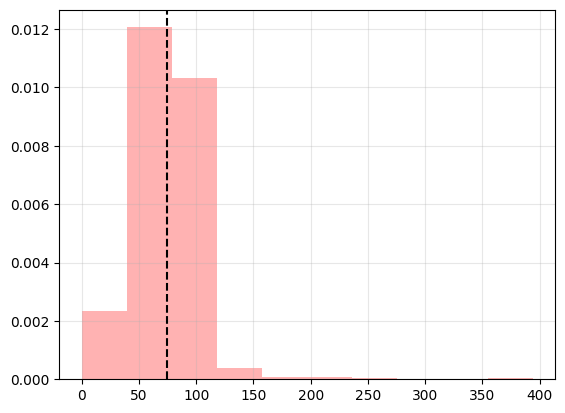

In [ ]:
cigarros_diarios = plt.hist(cardio['glucose'], density=True, bins=10, color='red', alpha=0.3)
plt.grid(alpha=0.3)
plt.axvline(cardio['glucose'].mean(), color='black', linestyle='--')

In [ ]:
cardio1.describe()

,age,BMI,glucose
count,4238.000000,4238.000000,4238.000000
mean,49.584946,25.686331,74.462482
std,8.572160,4.420935,32.869879
min,32.000000,0.000000,0.000000
25%,42.000000,23.050000,68.000000
50%,49.000000,25.380000,77.000000
75%,56.000000,28.037500,85.000000
max,70.000000,56.800000,394.000000


<Axes: xlabel='age'>

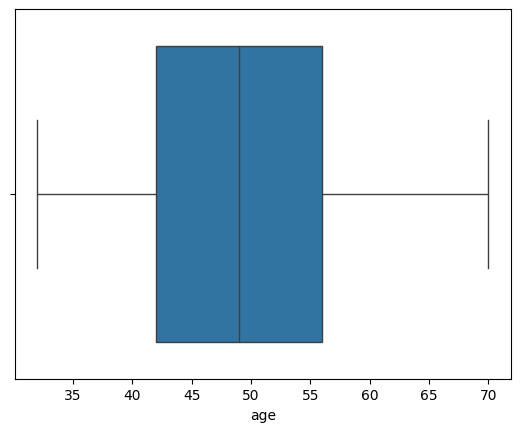

In [ ]:
sns.boxplot(x=cardio1["age"])

<Axes: xlabel='glucose'>

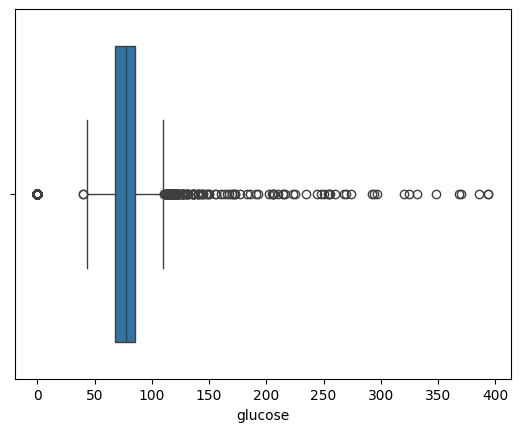

In [ ]:
sns.boxplot(x=cardio1["glucose"])

<Axes: xlabel='BMI'>

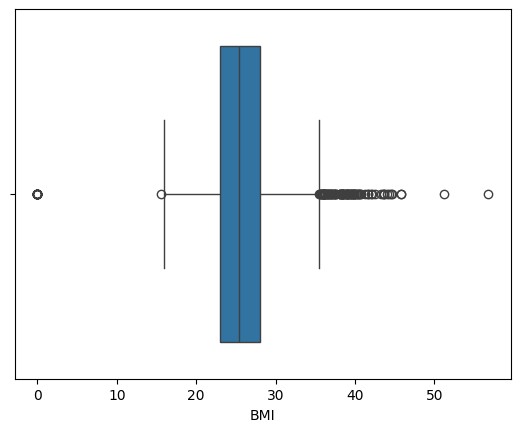

In [ ]:
sns.boxplot(x=cardio1["BMI"])

#3) ELIMINA LOS DATOS ATIPICOS DEL DATASET. PARA LAS SIGUIENTES PREGUNTAS CONSIDERA EL DATASET LIMPIO

In [ ]:
dataset_limpio =  pd.DataFrame(data=cardio, columns=['sex',  'age', 'glucose', 'BMI', 'education', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'heartRate', 'currentSmoker'])
dataset_limpio

,sex,age,glucose,BMI,education,cigsPerDay,totChol,sysBP,diaBP,heartRate,currentSmoker
0,M,39,77.0,26.97,4.0,0.0,195.0,106.0,70.0,80.0,No
1,F,46,76.0,28.73,2.0,0.0,250.0,121.0,81.0,95.0,No
2,M,48,70.0,25.34,1.0,20.0,245.0,127.5,80.0,75.0,Yes
3,F,61,103.0,28.58,3.0,30.0,225.0,150.0,95.0,65.0,Yes
4,F,46,85.0,23.10,3.0,23.0,285.0,130.0,84.0,85.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
4233,M,50,86.0,25.97,1.0,1.0,313.0,179.0,92.0,66.0,Yes
4234,M,51,68.0,19.71,3.0,43.0,207.0,126.5,80.0,65.0,Yes
4235,F,48,86.0,22.00,2.0,20.0,248.0,131.0,72.0,84.0,Yes
4236,F,44,0.0,19.16,1.0,15.0,210.0,126.5,87.0,86.0,Yes


In [ ]:
dataset_limpio = cardio['age']
p_25 = cardio['age'].quantile(0.25)
p_75 = cardio['age'].quantile(0.75)
IQR = p_75 - p_25
lim_inf = p_25 - 1.5 * IQR
lim_sup = p_75 + 1.5 * IQR

print(lim_inf )
print(lim_sup)

21.0
77.0


In [ ]:
dataset_limpio = cardio['age'] = np.where(cardio['age'] > lim_sup, np.nan, cardio['age'])

In [ ]:
dataset_limpio = cardio['glucose']
p_25 = cardio['glucose'].quantile(0.25)
p_75 = cardio['glucose'].quantile(0.75)
IQR = p_75 - p_25
lim_inf = p_25 - 1.5 * IQR
lim_sup = p_75 + 1.5 * IQR

print(lim_inf )
print(lim_sup)

42.5
110.5


In [ ]:
dataset_limpio = cardio['glucose'].where(cardio['glucose'] < lim_sup, np.nan)

In [ ]:
dataset_limpio = cardio['BMI']
p_25 = cardio['BMI'].quantile(0.25)
p_75 = cardio['BMI'].quantile(0.75)
IQR = p_75 - p_25
lim_inf = p_25 - 1.5 * IQR
lim_sup = p_75 + 1.5 * IQR

print(lim_inf )
print(lim_sup)

15.56875
35.518750000000004


In [ ]:
dataset_limpio = cardio['BMI'] = np.where(cardio['BMI'] > lim_sup, np.nan, cardio['BMI'])

In [ ]:
dataset_limpio = cardio['education']
p_25 = cardio['education'].quantile(0.25)
p_75 = cardio['education'].quantile(0.75)
IQR = p_75 - p_25
lim_inf = p_25 - 1.5 * IQR
lim_sup = p_75 + 1.5 * IQR

print(lim_inf )
print(lim_sup)

-2.0
6.0


In [ ]:
dataset_limpio = cardio['education'] = np.where(cardio['education'] > lim_sup, np.nan, cardio['education'])

In [ ]:
dataset_limpio = cardio['cigsPerDay']
p_25 = cardio['cigsPerDay'].quantile(0.25)
p_75 = cardio['cigsPerDay'].quantile(0.75)
IQR = p_75 - p_25
lim_inf = p_25 - 1.5 * IQR
lim_sup = p_75 + 1.5 * IQR

print(lim_inf )
print(lim_sup)

-30.0
50.0


In [ ]:
dataset_limpio = cardio['cigsPerDay'] = np.where(cardio['cigsPerDay'] > lim_sup, np.nan, cardio['cigsPerDay'])

In [ ]:
dataset_limpio = cardio['totChol']
p_25 = cardio['totChol'].quantile(0.25)
p_75 = cardio['totChol'].quantile(0.75)
IQR = p_75 - p_25
lim_inf = p_25 - 1.5 * IQR
lim_sup = p_75 + 1.5 * IQR

print(lim_inf )
print(lim_sup)

119.5
347.5


In [ ]:
dataset_limpio = cardio['totChol'] = np.where(cardio['totChol'] > lim_sup, np.nan, cardio['totChol'])

In [ ]:
dataset_limpio = cardio['sysBP']
p_25 = cardio['sysBP'].quantile(0.25)
p_75 = cardio['sysBP'].quantile(0.75)
IQR = p_75 - p_25
lim_inf = p_25 - 1.5 * IQR
lim_sup = p_75 + 1.5 * IQR

print(lim_inf )
print(lim_sup)

76.5
184.5


In [ ]:
dataset_limpio = cardio['sysBP'] = np.where(cardio['sysBP'] > lim_sup, np.nan, cardio['sysBP'])

In [ ]:
dataset_limpio = cardio['diaBP']
p_25 = cardio['diaBP'].quantile(0.25)
p_75 = cardio['diaBP'].quantile(0.75)
IQR = p_75 - p_25
lim_inf = p_25 - 1.5 * IQR
lim_sup = p_75 + 1.5 * IQR

print(lim_inf )
print(lim_sup)

52.6875
112.1875


In [ ]:
dataset_limpio = cardio['diaBP'] = np.where(cardio['diaBP'] > lim_sup, np.nan, cardio['diaBP'])

In [ ]:
dataset_limpio = cardio['heartRate']
p_25 = cardio['heartRate'].quantile(0.25)
p_75 = cardio['heartRate'].quantile(0.75)
IQR = p_75 - p_25
lim_inf = p_25 - 1.5 * IQR
lim_sup = p_75 + 1.5 * IQR

print(lim_inf )
print(lim_sup)

45.5
105.5


In [ ]:
dataset_limpio = cardio['heartRate'] = np.where(cardio['heartRate'] > lim_sup, np.nan, cardio['heartRate'])

#4) ¿QUE VARIABLES CUANTITATIVAS PRESENTAN MAYOR CORRELACIÓN? EXPLIQUE

In [ ]:
variables = ["totChol","sysBP","diaBP","BMI","heartRate","glucose","education", "cigsPerDay"]
matriz_correlacion = cardio[variables].corr()

<Axes: >

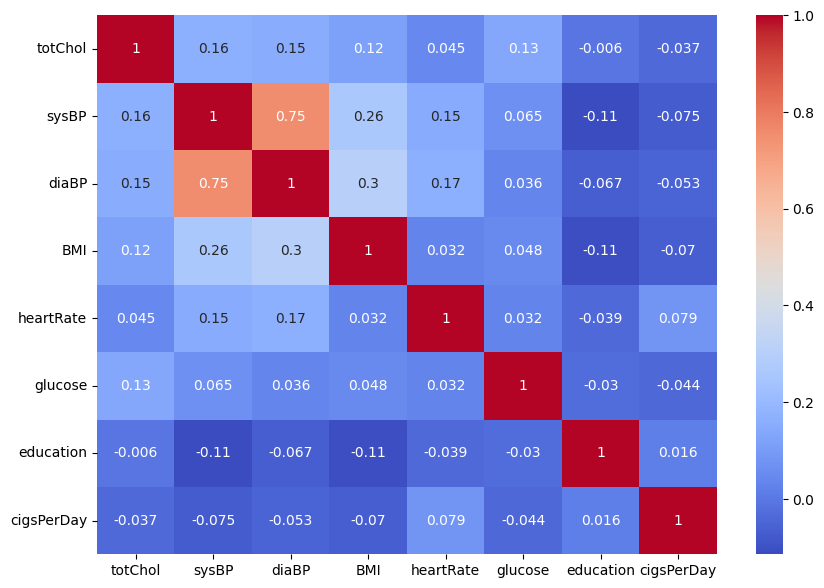

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))

sns.heatmap(matriz_correlacion, annot = True, cmap ="coolwarm")

#5) SI DE ESTE DATASET SE ESCOGE UN PACIENTE AL AZAR ¿CUAL ES LA PROBABILIDAD DE QUE SEA HOMBRE, SI SE SABE QUE PERTENECE AL MAYOR CUARTIL DE LA VARIABLE CORRESPONDIENTE AL INDICE DE MASA CORPORAL?

In [ ]:
imc_percentil_75 = cardio["BMI"].quantile(0.75)
total_con_imc_alto = len(cardio["BMI"] >= imc_percentil_75)
hombres_con_imc_alto = len(cardio[(cardio["sex"] == "M") & (cardio["BMI"] >= imc_percentil_75)])
total_con_imc_alto = len(cardio[cardio["BMI"] >= imc_percentil_75])
probabilidad_hombres_imc_alto = hombres_con_imc_alto / total_con_imc_alto
print("Probabilidad de que un hombre tenga IMC superior al percentil 75: {:.2f}%".format(probabilidad_hombres_imc_alto * 100))

Probabilidad de que un hombre tenga IMC superior al percentil 75: 51.35%


#6) ¿ES RAZONABLE AFIRMAR QUE PARA UNA PERSONA CUALQUIERA (NO NECESARIAMENTE DENTRO DEL DATASET) SU RITMO PROMEDIO ES 75?  EXPLICA Y JUSTIFICA

In [ ]:
total_personas = len(cardio)
ritmo_cardiaco = len(cardio[cardio["sex"] == 'M']) & len(cardio[cardio["sex"] == 'F'])
ritmo_promedio = len(cardio[cardio["heartRate"] >= cardio["heartRate"].mean()])
probabilidad_ritmo_cardiaco_promedio = ritmo_cardiaco / ritmo_promedio
print("Probabilidad de que una persona tenga un ritmo cardíaco promedio de 75 es: {:.2f}%".format(probabilidad_ritmo_cardiaco_promedio * 100))

Probabilidad de que una persona tenga un ritmo cardíaco promedio de 75 es: 16.07%


:#7) SER HOMBRE INFLUYE EN EL PROMEDIO DE CIGARRILLOS CONSUMIDOS POR DÍA, DENTRO DE LOS PACIENTES FUMADORES? EXPLICA

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats import norm

In [ ]:
cardio.value_counts('sex')

sex
F    2419
M    1819
Name: count, dtype: int64

In [ ]:
media_fumador_habitual = (float(np.mean(cardio['currentSmoker'] == 'Yes')))
media_fumador_habitual

0.49410099103350635

In [ ]:
media_hombre = (float(np.mean(cardio['sex'] == 'M')))
media_hombre

0.42921189240207647

In [ ]:
media_cigarros_por_dia = cardio['cigsPerDay'].mean()
media_cigarros_por_dia

8.794131566493137

In [ ]:
media_hombre_fumador = float(np.mean((cardio['sex'] == 'M') & (cardio['currentSmoker'] == 'Yes')))

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
#Se realiza una prueba t de muestras independientes para comparar las medias
_stat, p_value = ttest_ind(
    cardio[cardio['sex'] == 'M']['age'],
    cardio[cardio['currentSmoker'] == 'Yes']['age'],
    equal_var=False
)

# Se agrega el nivel de significancia (alfa)
alpha = 0.05

#Comprobación si el valor P es mayor que alfa para rechazar o no la hipótesis nula.

if p_value > alpha:
    print("Resultado: existe evidencia para aceptar la hipótesis nula")
else:
    print("Resultado: no existe evidencia para rechazar la hipótesis nula")

#Impresión de las medias entre hombre y fumadores recurrentes

print(f"Media de hombres: {media_hombre}")
print(f"Media de fumador: {media_hombre_fumador }")

# Impresión del valor T y el valor P.
print(f"Valor t: {_stat}")
print(f"Valor p: {p_value}")

Resultado: no existe evidencia para rechazar la hipótesis nula
Media de hombres: 0.42921189240207647
Media de fumador: 0.26097215667767815
Valor t: 5.904299862910678
Valor p: 3.855979103978248e-09


#POR LO TANTO, NO PODEMOS RECHAZAR LA HIPÓTESIS NULA, LO CUAL, NOS PERMITE CONCLUIR QUE HAY UNA INCIDENCIA ENTRE SER HOMBRE Y ESTAR EN EL PROMEDIO DE FUMADORES.

#8) CONSTRUYE UN MODELO DE REGRESIÓN LINEAL QUE PERMITA RELACIONAR SEIS VARIABLES DEL DATASET CON EL INDICE DE MASA CORPORAL (DEBES INCLUIR A LO MENOS DOS VARIABLES CUALITATIVAS) EVALUA TU MODELO Y EXPLICA

In [ ]:
# Impute NaN values with the mean of each column
cardio.fillna(0, inplace=True)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
cardio = pd.get_dummies(cardio, columns=['sex', "currentSmoker"], drop_first=True)

In [ ]:
cardio.rename(columns={'sex_M': "sex", "currentSmoker_Yes": "currentSmoker"}, inplace = True)

In [ ]:
x = cardio[['sex','age','cigsPerDay','currentSmoker','heartRate','glucose']]
y = cardio["BMI"]

In [ ]:
modelo = LinearRegression()
modelo.fit(x, y)

LinearRegression()

In [ ]:
y_predic = modelo.predict(x)
mse = mean_squared_error(y, y_predic)
mae = mean_absolute_error(y, y_predic)
r2 = r2_score(y, y_predic)

print(mse, mae, r2)

28.277984037572345 3.315022612859692 0.034753253255160876


#9) CONSTRUYE UN MODELO DE REGRESIÓN LOGÍSTICA PARA PREDECIR EL RIESGO DE SUFRIR UNA ENFERMEDAD CORONARIA EN LOS PRÓXIMOS 10 AÑOS, A PARTIR DE LAS VARIABLES DESCRITAS, VERIFICA EL BALANCEO DE DATOS Y EVALUA TU MODELO

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score
from imblearn.over_sampling import SMOTE

In [ ]:
X = cardio.drop(columns=["TenYearCHD"]).values
Y = cardio["TenYearCHD"].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

smote = SMOTE(random_state=50)
X_stand, Y_stand = smote.fit_resample(X, Y)

In [ ]:
logistic_reg = LogisticRegression(random_state=50)

In [ ]:
logistic_reg.fit(X_stand, Y_stand)

LogisticRegression(random_state=50)

In [ ]:
y_predic_s = logistic_reg.predict(X)

In [ ]:
y_predic_s

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
roc_auc = roc_auc_score(Y, y_predic_s)
roc_auc

0.6674625065239858

#10) SEPARA LOS MODELOS DE REGRESIÓN ANTERIORES EN DOS DISTINTOS, RESPECTIVAMENTE CONSIDERANDO ALGUNA VARIABLE CATEGORICA. COMPARA Y CONCLUYE

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score
from imblearn.over_sampling import SMOTE

# MODELO DE REGRESIÓN LINEAL CON VARIABLES CATEGORICAS DE SEXO Y CONCURRENCIA DE FUMADOR

In [ ]:
x = cardio[['sex']]
y = cardio["prevalentStroke"]

In [ ]:
modelo = LinearRegression()
modelo.fit(x, y)

LinearRegression()

In [ ]:
y_predic = modelo.predict(x)
mse = mean_squared_error(y, y_predic)
mae = mean_absolute_error(y, y_predic)
r2 = r2_score(y, y_predic)

print(mse, mae, r2)

0.005864089451832629 0.011728178903665256 2.0669085962432554e-05


#MODELO DE REGRESIÓN LOGÍSTICA CON VARIABLES CATEGORICA prevalentHyp

In [ ]:
X = cardio.drop(columns=["prevalentStroke"]).values
Y = cardio["prevalentStroke"].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

smote = SMOTE(random_state=50)
X_stand, Y_stand = smote.fit_resample(X, Y)

In [ ]:
logistic_reg = LogisticRegression(random_state=50)

In [ ]:
logistic_reg.fit(X_stand, Y_stand)

LogisticRegression(random_state=50)

In [ ]:
y_predic_s = logistic_reg.predict(X)

In [ ]:
y_predic_s

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
roc_auc = roc_auc_score(Y, y_predic_s)
roc_auc

0.7855305008307619